**Importing Libraries**

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.stats import boxcox #for gausian transformation using boxcox method
import matplotlib.pyplot as plt
import seaborn as sns

# Disable all runtime warnings
warnings.filterwarnings("ignore")

**Reading Data**

In [23]:
df = pd.read_csv("po2_data.csv")
df

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


**Dividing into X and Y Columns**

In [24]:
X = df.drop(columns=["subject#","motor_updrs","total_updrs"])
useless_columns = ["subject#"]
Y_mobile_UPDRS = df["motor_updrs"]
Y_totol_UPDRS = df["total_updrs"]
X

,age,sex,test_time,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


**Train Test Split using Random Funtion and 0.4 test Ratio**

In [25]:
def calculating_train_test_split(X,Y,train_test_ratio):
    return  train_test_split(X, Y, test_size=train_test_ratio/10, random_state=42)

**Train Models for X_Train and Y_Trains**

In [26]:
def create_Model(X_train,y_train):
    X_train_model = sm.add_constant(X_train)
    return sm.OLS(y_train, X_train_model).fit()

**Test the Models**

In [27]:
def test_Model(X_test,model):
    X_test_model = sm.add_constant(X_test)
    return model.predict(X_test_model)

**Calculating Matrics**

In [28]:
def calculating_matrics(y_test,y_pred,X_test):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    nrmse = rmse / np.mean(y_test)
    r2 = r2_score(y_test, y_pred)

    #for Adjusted R2
    n = len(y_test)
    p = X_test.shape[1] - 1

    #ar2
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return mae,mse,rmse,nrmse,r2,adjusted_r2

**TASK 2**

**Calling Task 1 Functions With respective data**

In [29]:
def task1_funcs(X,Y,train_test_ratio):
    X_train, X_test, y_train, y_test = calculating_train_test_split(X,Y,train_test_ratio)
    model = create_Model(X_train,y_train)
    y_pred = test_Model(X_test,model)
    mae,mse,rmse,nrmse,r2,adjusted_r2 = calculating_matrics(y_test,y_pred,X_test)

    print("MAE : ",mae)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("NRMSE : ",nrmse)
    print("R2 : ",r2)
    print("Adjusted R2 : ",adjusted_r2)

In [30]:
def task2_func(train_test_ratio):
    print("For Mobile UPDRS with train test ratio of ",train_test_ratio/10)
    task1_funcs(X,Y_mobile_UPDRS,train_test_ratio)

    print("For Total UPDRS with train test ratio of ",train_test_ratio/10)
    task1_funcs(X,Y_totol_UPDRS,train_test_ratio)

In [31]:
for i in range(2,6):
    task2_func(i)

For Mobile UPDRS with train test ratio of  0.2
MAE :  6.353395591926574
MSE :  56.01419722157618
RMSE :  7.484263305200866
NRMSE :  0.3538555426893268
R2 :  0.12243652571442931
Adjusted R2 :  0.10877204255081308
For Total UPDRS with train test ratio of  0.2
MAE :  8.053791050254107
MSE :  93.30672070272986
RMSE :  9.659540398110558
NRMSE :  0.3355309932469879
R2 :  0.15798070419828347
Adjusted R2 :  0.14486967710102494
For Mobile UPDRS with train test ratio of  0.3
MAE :  6.298602796710174
MSE :  55.49613316609865
RMSE :  7.449572683456323
NRMSE :  0.3485495157906591
R2 :  0.14848629958362403
Adjusted R2 :  0.1396977407490514
For Total UPDRS with train test ratio of  0.3
MAE :  7.970270581534942
MSE :  92.22609413538045
RMSE :  9.603441785910947
NRMSE :  0.3305438812474735
R2 :  0.1800687339080198
Adjusted R2 :  0.17160614056532741
For Mobile UPDRS with train test ratio of  0.4
MAE :  6.209385643899922
MSE :  54.23739099617656
RMSE :  7.364603926632888
NRMSE :  0.3452995269771497
R2 : 

**Task 3**

In [32]:
# log the X for calulation
X_log = np.log1p(X)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_log_imputed = imputer.fit_transform(X_log)

# Calculate VIF for each feature manually
vif_data = pd.DataFrame()
vif_data["Variable"] = X_log.columns
vif_data["VIF"] = [variance_inflation_factor(X_log_imputed, i) for i in range(X_log_imputed.shape[1])]

# Display the VIF values
print(vif_data)

          Variable           VIF
0              age    714.957668
1              sex      2.191358
2        test_time     28.038790
3        jitter(%)    203.394849
4      jitter(abs)     25.547043
5      jitter(rap)  16826.151716
6     jitter(ppq5)     57.012622
7      jitter(ddp)  17409.436504
8       shimmer(%)    450.473109
9     shimmer(abs)    250.072298
10   shimmer(apq3)   7934.824156
11   shimmer(apq5)    143.074941
12  shimmer(apq11)     52.868698
13    shimmer(dda)   8669.839003
14             nhr     12.359359
15             hnr    595.040411
16            rpde     73.822746
17             dfa    189.695975
18             ppe     37.227438


This indicates that majority of columns provide little to no effect. The higher the VIF the lesser the predictibilty using that columns

In [33]:
def task3_func(train_test_ratio):
    print("For Mobile UPDRS with Log Transformation and with train test ratio of ",train_test_ratio/10)
    task1_funcs(X_log_imputed,Y_mobile_UPDRS,train_test_ratio)

    print("For Total UPDRS with Log Transformation and with train test ratio of ",train_test_ratio/10)
    task1_funcs(X_log_imputed,Y_totol_UPDRS,train_test_ratio)

In [34]:
for i in range(2,6):
    task3_func(i)

For Mobile UPDRS with Log Transformation and with train test ratio of  0.2
MAE :  6.304429026464195
MSE :  55.110513859731505
RMSE :  7.423645590929803
NRMSE :  0.35098954061199905
R2 :  0.1365943562290297
Adjusted R2 :  0.12315032371356471
For Total UPDRS with Log Transformation and with train test ratio of  0.2
MAE :  7.982229594286603
MSE :  92.73492754596695
RMSE :  9.629897587511872
NRMSE :  0.3345013291767641
R2 :  0.16314068482535593
Adjusted R2 :  0.15011000344720404
For Mobile UPDRS with Log Transformation and with train test ratio of  0.3
MAE :  6.272706442780109
MSE :  54.92588912207851
RMSE :  7.411200248413108
NRMSE :  0.34675415191915504
R2 :  0.15723592930306218
Adjusted R2 :  0.14853767627981396
For Total UPDRS with Log Transformation and with train test ratio of  0.3
MAE :  7.934544964252485
MSE :  92.14342615259572
RMSE :  9.599136739967596
NRMSE :  0.33039570451804806
R2 :  0.18080368928507895
Adjusted R2 :  0.17234868149100302
For Mobile UPDRS with Log Transformatio

There is not much difference between the performance matrix of linear and log transmission Lower MAE, MSE, RMSE, and higher R-squared values indicate better performance.
for 0.2 mobile
MAE :  6.304429026463704
MSE :  55.11051385972673

MAE :  6.353395591926878
MSE :  56.01419722157606

There is a slight difference at other train test ratios too but the gain or loss is not enough to hit a dent

**TASK 4**

In [35]:
# Creating standard scaller
scaler = StandardScaler()

# standardizing the x columns
X_standardized = scaler.fit_transform(X)

#for gausian transformation using boxcox method
Y_totol_UPDRS_Gau,_ =  boxcox(Y_totol_UPDRS)
Y_mobile_UPDRS_Gau,_ =  boxcox(Y_mobile_UPDRS)


In [36]:
def task4_func(train_test_ratio):
    print("For Mobile UPDRS with Scalar and Gaussian Transformation on target and with train test ratio of ",train_test_ratio/10)
    task1_funcs(X_standardized,Y_mobile_UPDRS_Gau,train_test_ratio)

    print("For Total UPDRS with scalar and Gaussian Transformation on target and with train test ratio of ",train_test_ratio/10)
    task1_funcs(X_standardized,Y_totol_UPDRS_Gau,train_test_ratio)

In [37]:
for i in range(2,6):
    task4_func(i)

For Mobile UPDRS with Scalar and Gaussian Transformation on target and with train test ratio of  0.2
MAE :  2.9518393729989922
MSE :  12.18937450612112
RMSE :  3.4913284729628518
NRMSE :  0.3025138073400021
R2 :  0.1264265721794483
Adjusted R2 :  0.11282421776701768
For Total UPDRS with scalar and Gaussian Transformation on target and with train test ratio of  0.2
MAE :  2.8132354757347846
MSE :  11.453020079972239
RMSE :  3.3842310913961295
NRMSE :  0.2614906440437679
R2 :  0.16653216508522106
Adjusted R2 :  0.15355429222322625
For Mobile UPDRS with Scalar and Gaussian Transformation on target and with train test ratio of  0.3
MAE :  2.9234352095345977
MSE :  12.03855694270816
RMSE :  3.469662367249609
NRMSE :  0.298051371034329
R2 :  0.1529199222957518
Adjusted R2 :  0.14417712332862076
For Total UPDRS with scalar and Gaussian Transformation on target and with train test ratio of  0.3
MAE :  2.7776561146171255
MSE :  11.26917743500293
RMSE :  3.3569595521845255
NRMSE :  0.25758024349

As stated in the conclussion of task 3 Lower MAE, MSE, RMSE, and higher R-squared values indicate better performance.
At 0.2 train test ratio
For Mobile UPDRS with train test ratio of  0.2
MAE :  6.353395591926878
MSE :  56.01419722157606
RMSE :  7.484263305200857
For Mobile UPDRS with Scalar and Gaussian Transformation on target and with train test ratio of  0.2
MAE :  2.9518393729989603
MSE :  12.18937450612094
RMSE :  3.491328472962826

It can be seen there is a significant performance gain. when standardize the X and gausian transform the target(y_mobile_updrs and y_total_updrs)

**Visualizations**

Column Name :  subject#
Column Name :  age


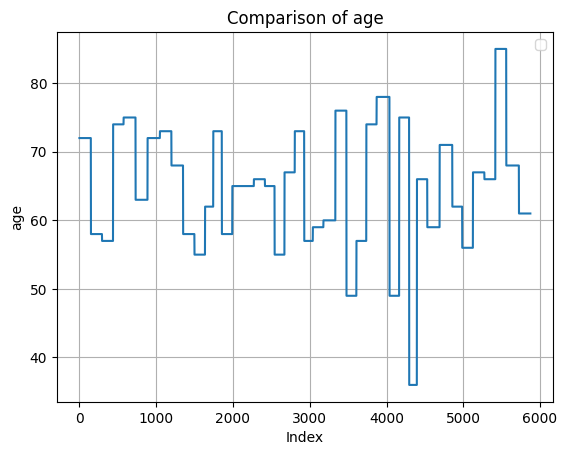

Column Name :  sex


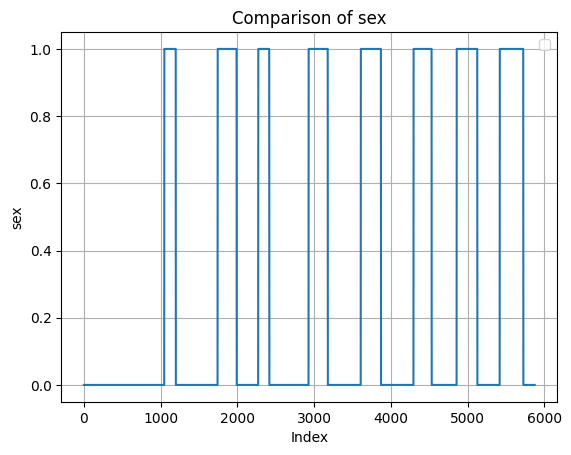

Column Name :  test_time


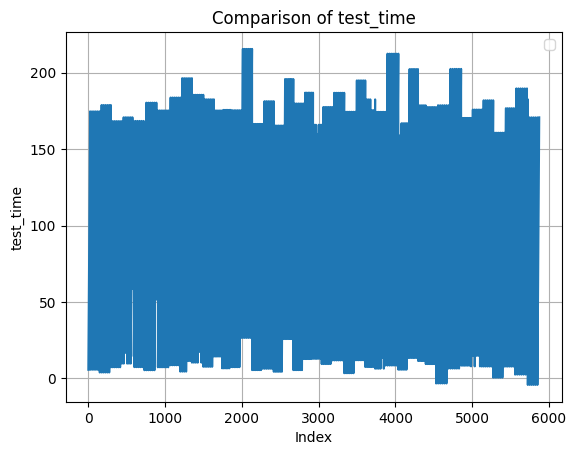

Column Name :  motor_updrs


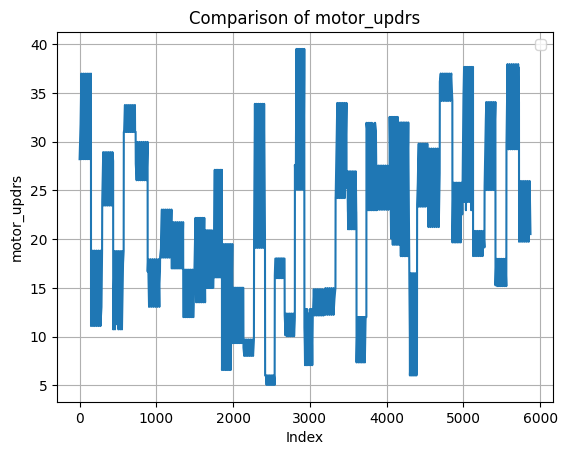

Column Name :  total_updrs


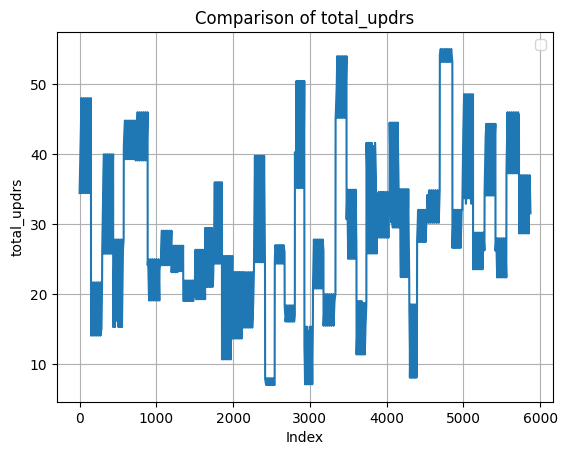

Column Name :  jitter(%)


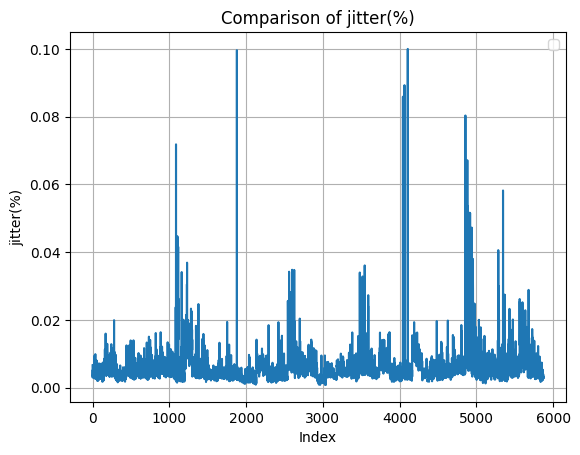

Column Name :  jitter(abs)


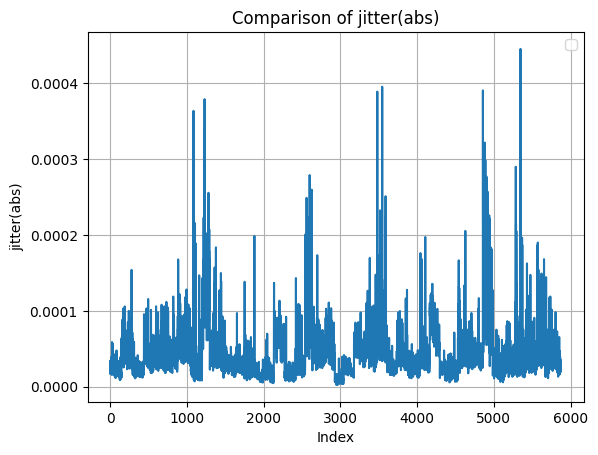

Column Name :  jitter(rap)


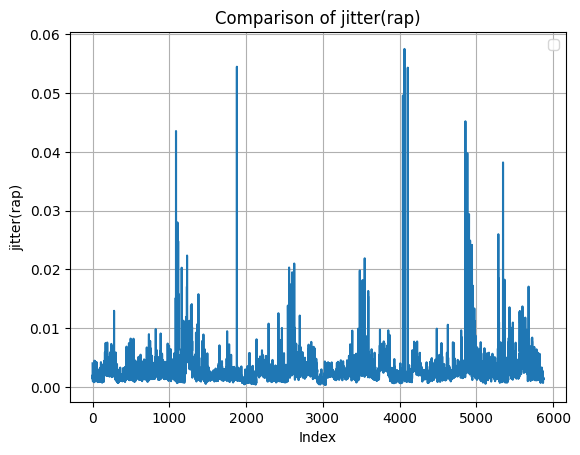

Column Name :  jitter(ppq5)


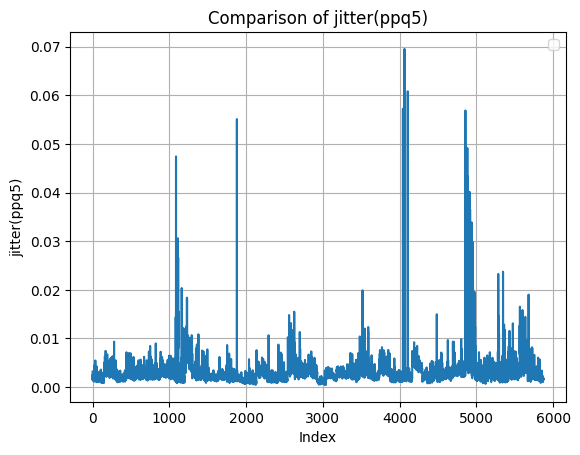

Column Name :  jitter(ddp)


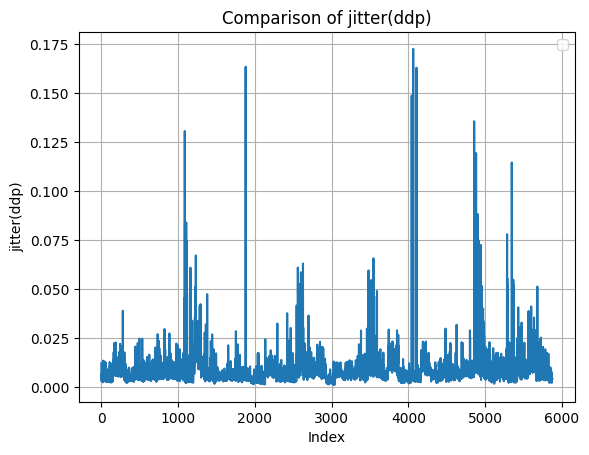

Column Name :  shimmer(%)


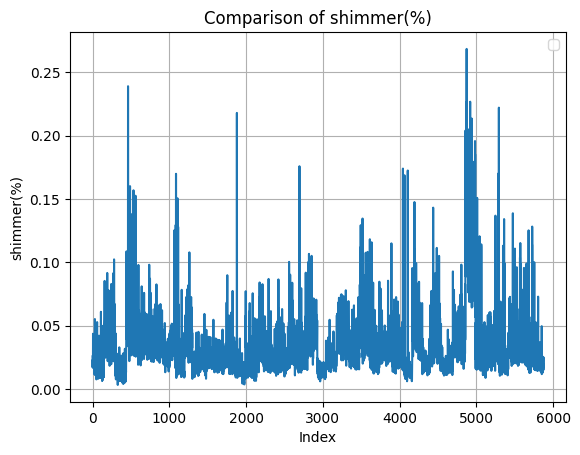

Column Name :  shimmer(abs)


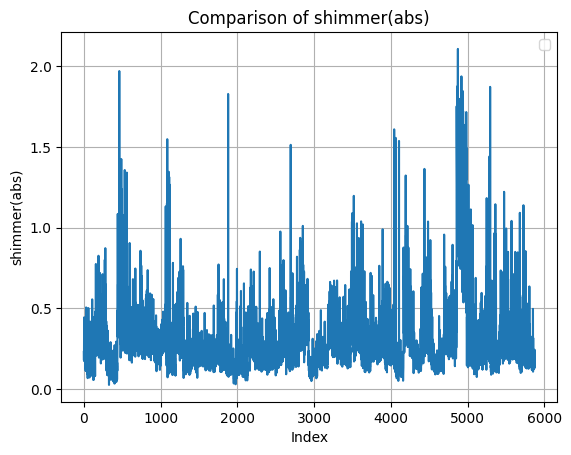

Column Name :  shimmer(apq3)


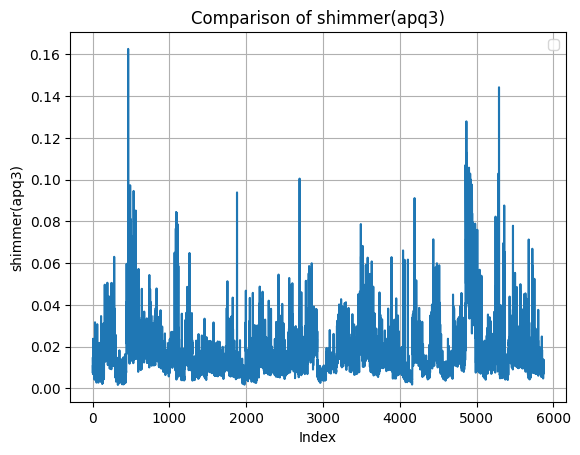

Column Name :  shimmer(apq5)


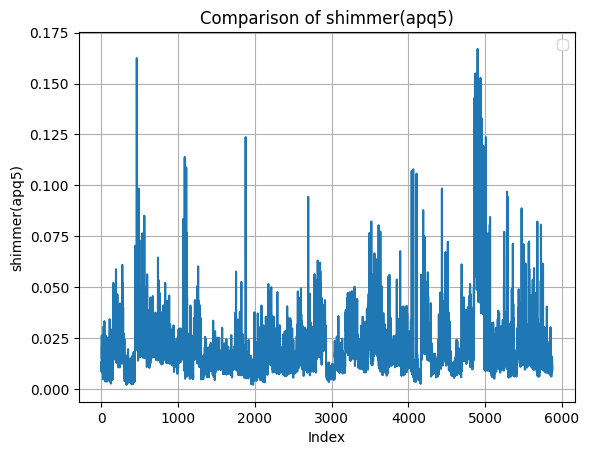

Column Name :  shimmer(apq11)


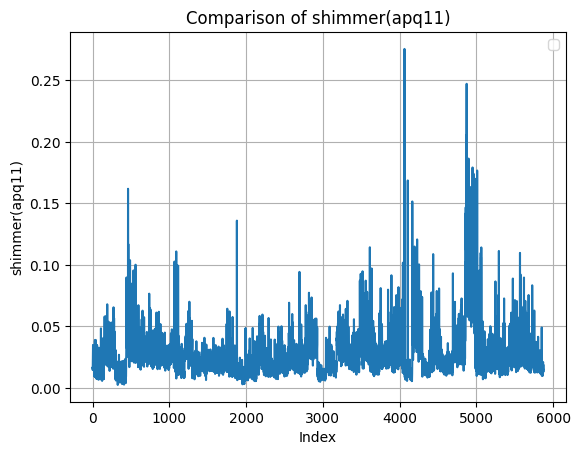

Column Name :  shimmer(dda)


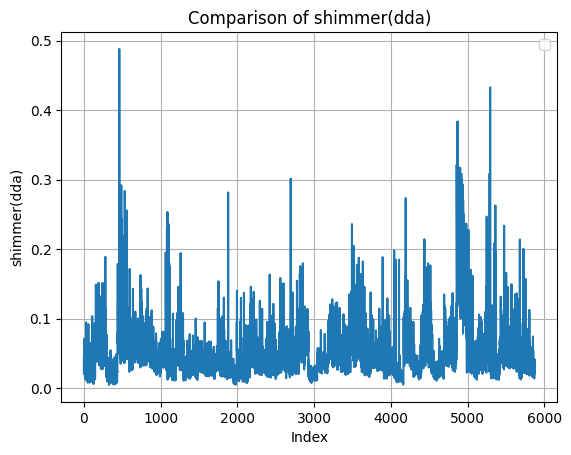

Column Name :  nhr


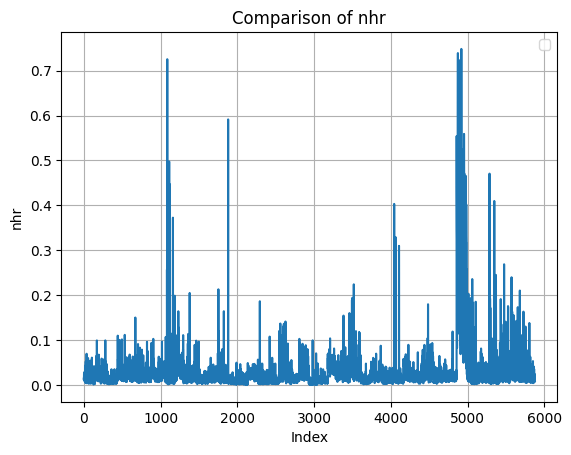

Column Name :  hnr


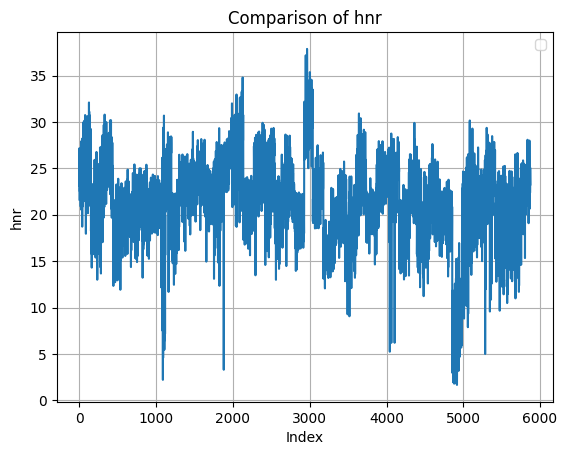

Column Name :  rpde


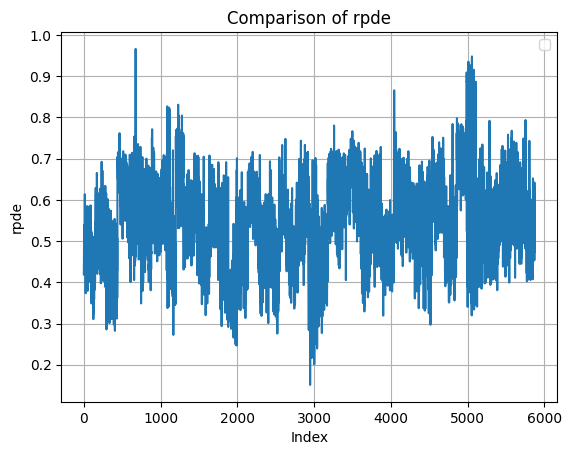

Column Name :  dfa


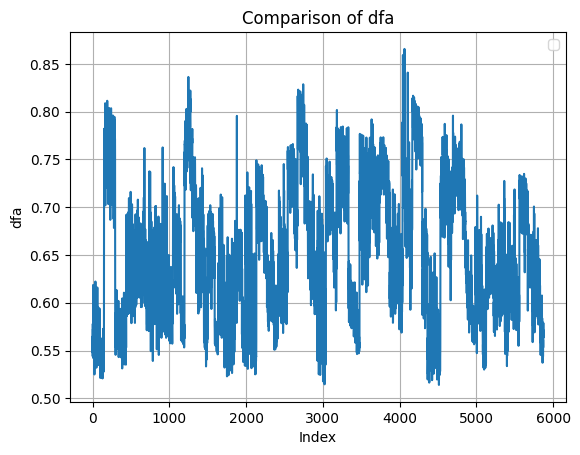

Column Name :  ppe


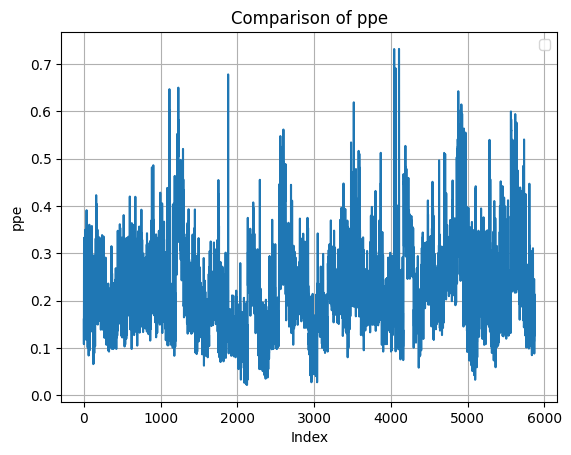

In [38]:
for column in df.columns:
    print("Column Name : ", column)
    if column not in useless_columns:
        series = np.array(df[column])
        plt.plot(series)

        plt.title(f'Comparison of {column}')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()

**Box Plots of All**

Column Name :  subject#
Column Name :  age


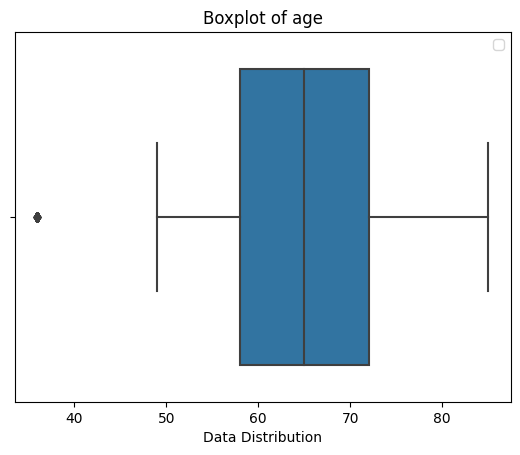

Column Name :  sex


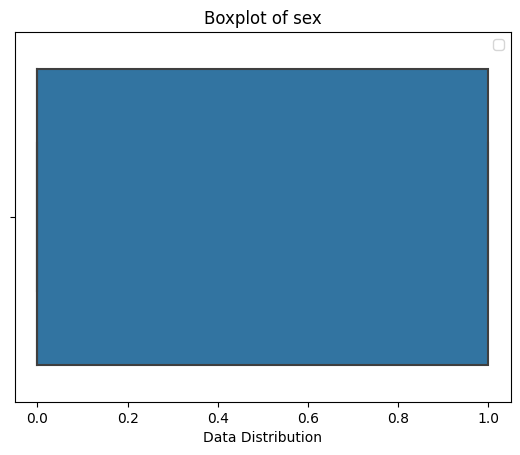

Column Name :  test_time


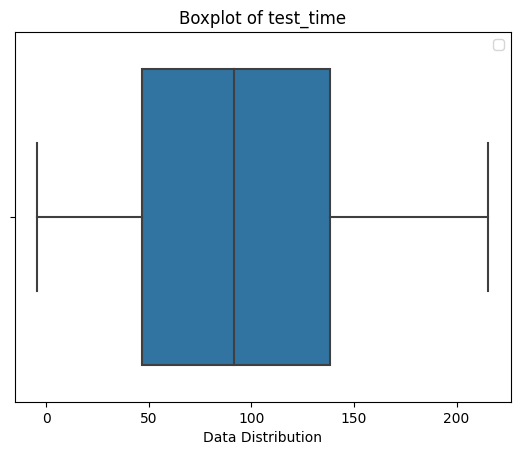

Column Name :  motor_updrs


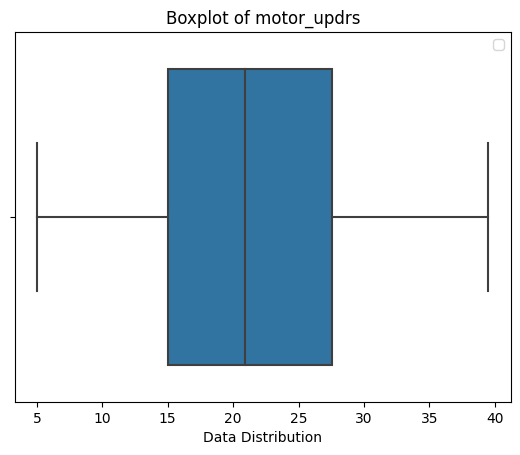

Column Name :  total_updrs


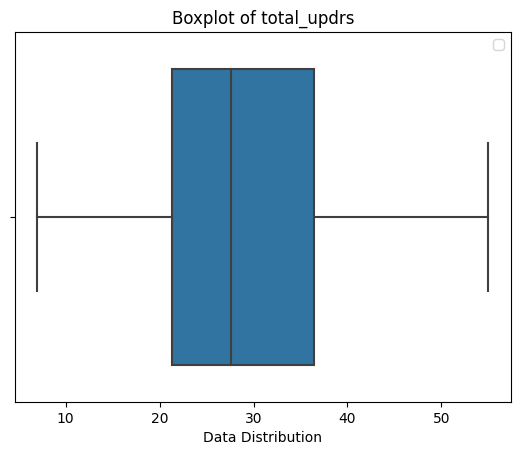

Column Name :  jitter(%)


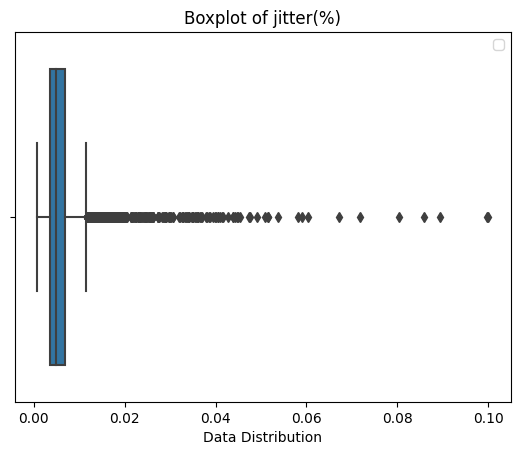

Column Name :  jitter(abs)


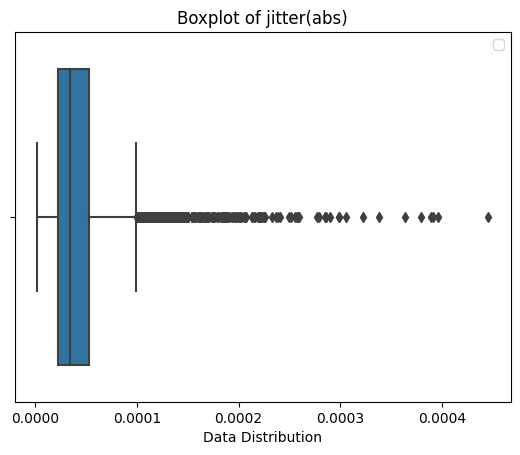

Column Name :  jitter(rap)


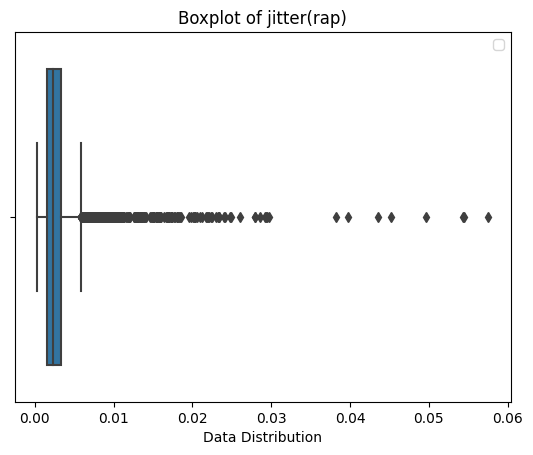

Column Name :  jitter(ppq5)


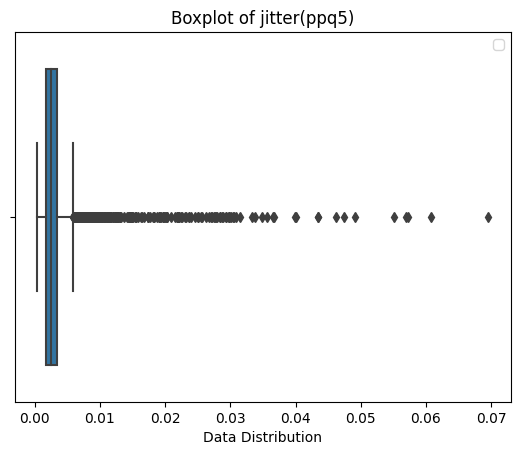

Column Name :  jitter(ddp)


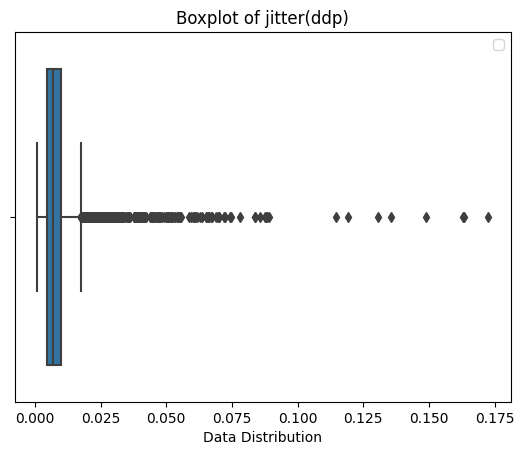

Column Name :  shimmer(%)


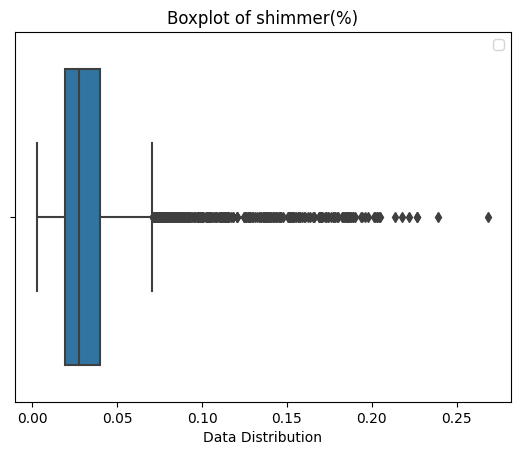

Column Name :  shimmer(abs)


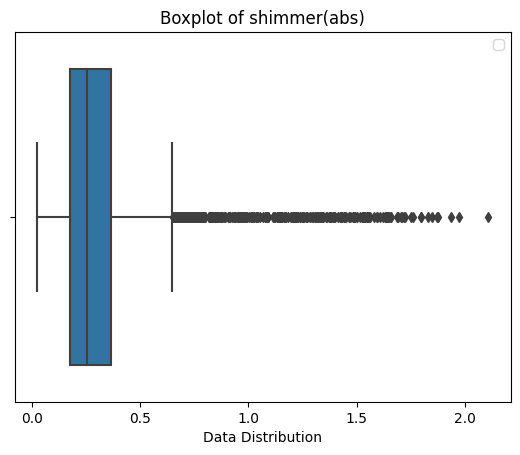

Column Name :  shimmer(apq3)


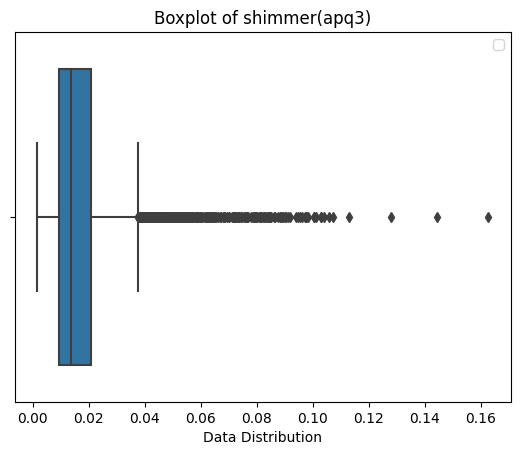

Column Name :  shimmer(apq5)


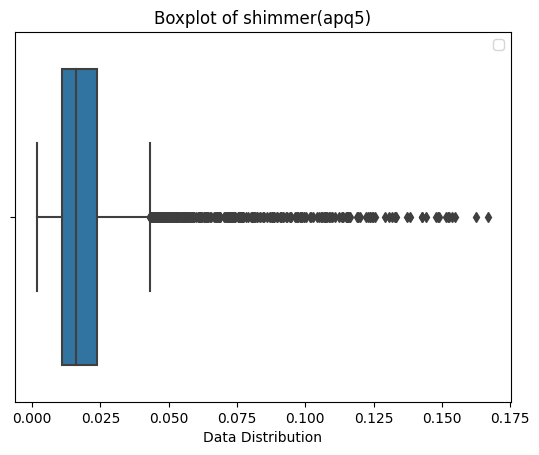

Column Name :  shimmer(apq11)


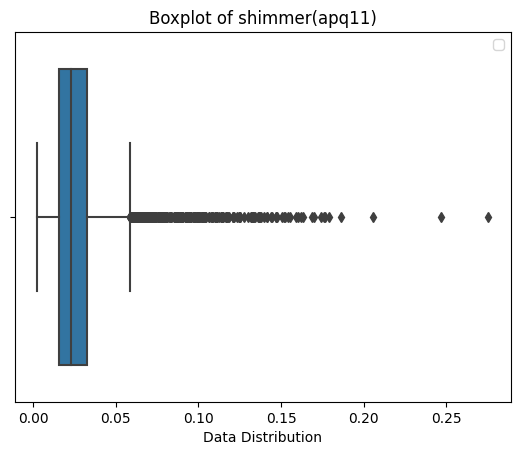

Column Name :  shimmer(dda)


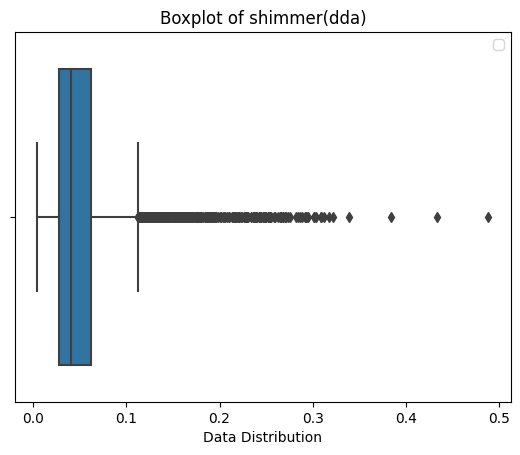

Column Name :  nhr


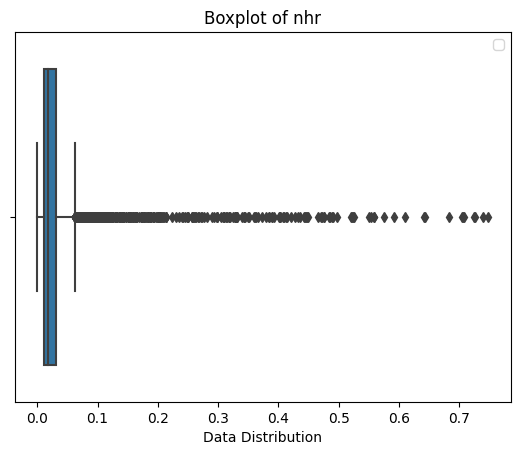

Column Name :  hnr


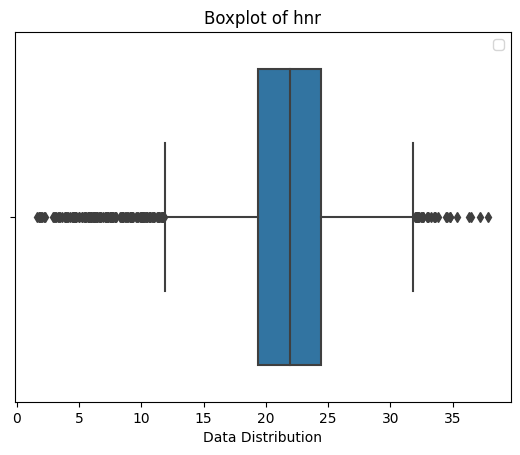

Column Name :  rpde


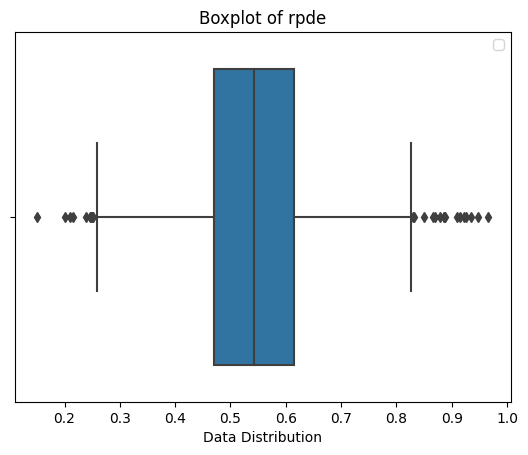

Column Name :  dfa


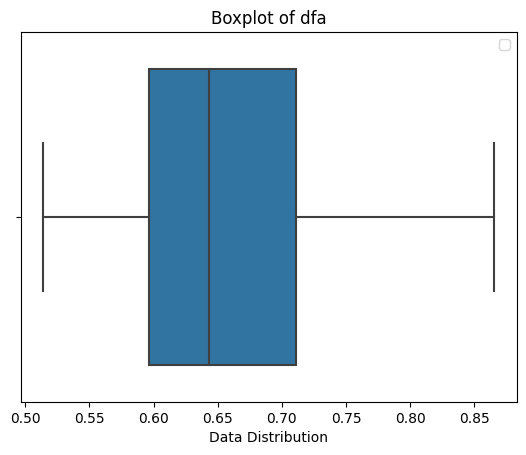

Column Name :  ppe


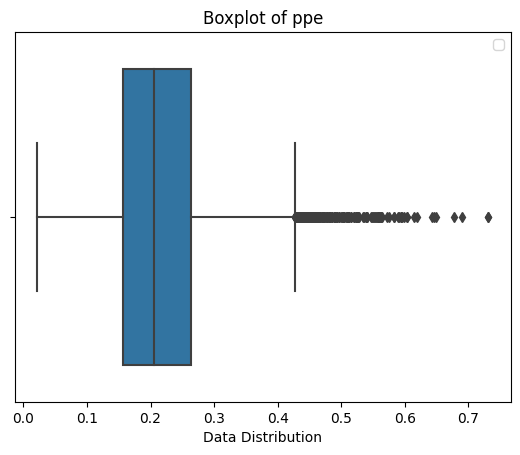

In [40]:
for column in df.columns:
    print("Column Name : ", column)
    if column not in useless_columns:
        series = np.array(df[column])

        sns.boxplot(x=series)

        plt.title(f'Boxplot of {column}')
        plt.xlabel('Data Distribution')
        plt.legend()
        plt.show()

**Scatter Plot of all columns against total updrs**

Column Name :  subject#
Column Name :  age


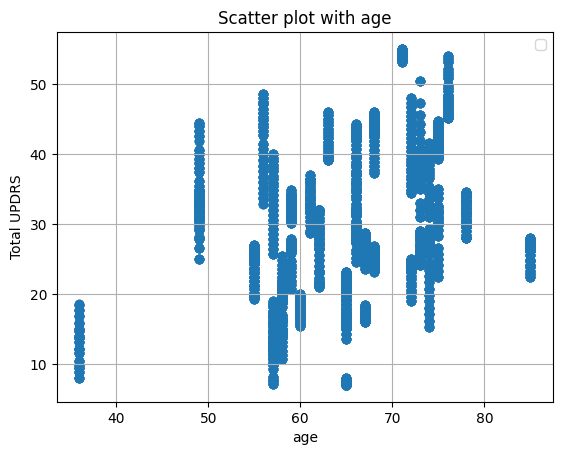

Column Name :  sex


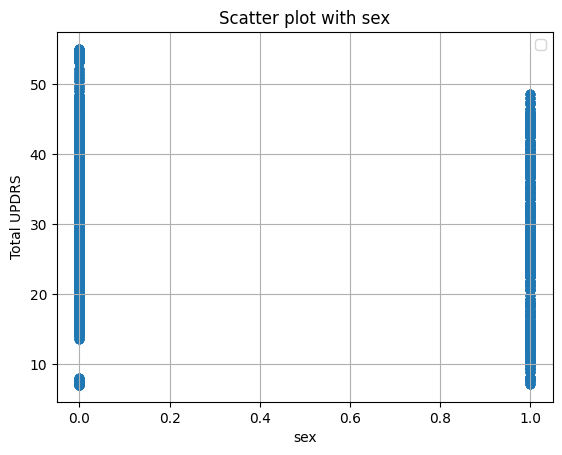

Column Name :  test_time


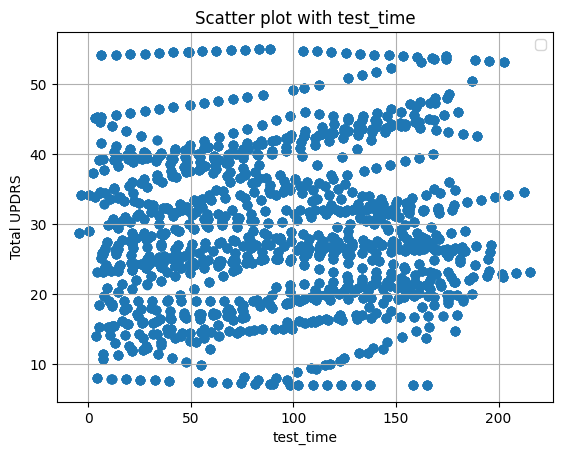

Column Name :  motor_updrs


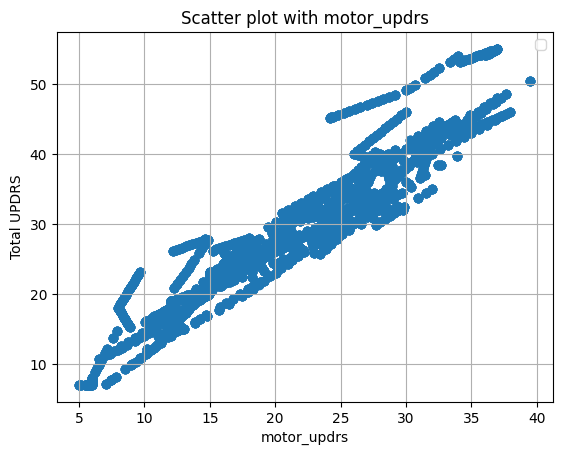

Column Name :  total_updrs


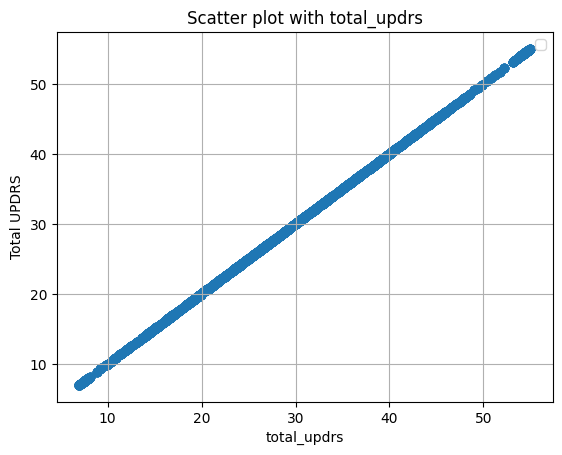

Column Name :  jitter(%)


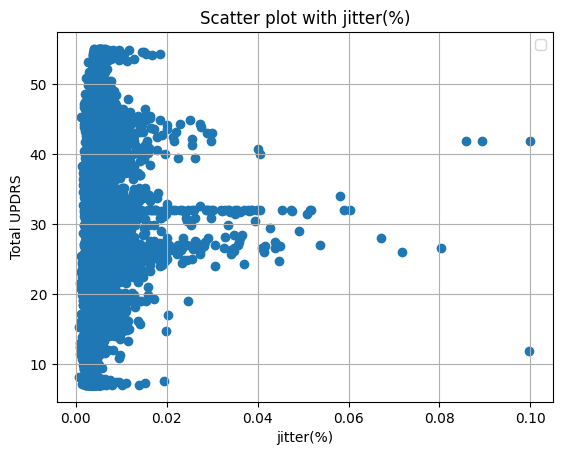

Column Name :  jitter(abs)


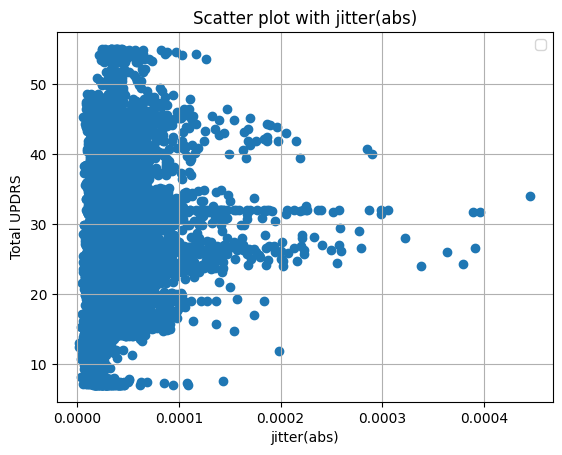

Column Name :  jitter(rap)


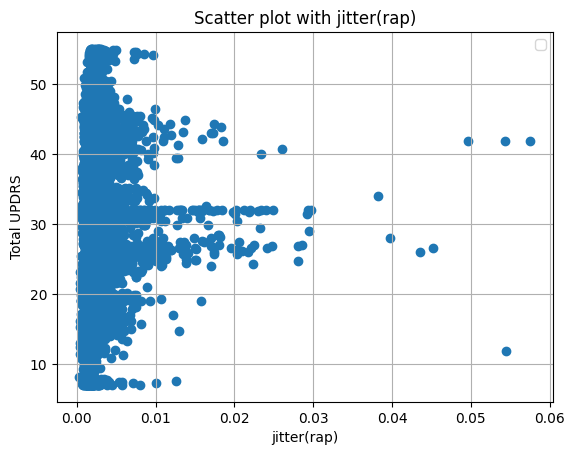

Column Name :  jitter(ppq5)


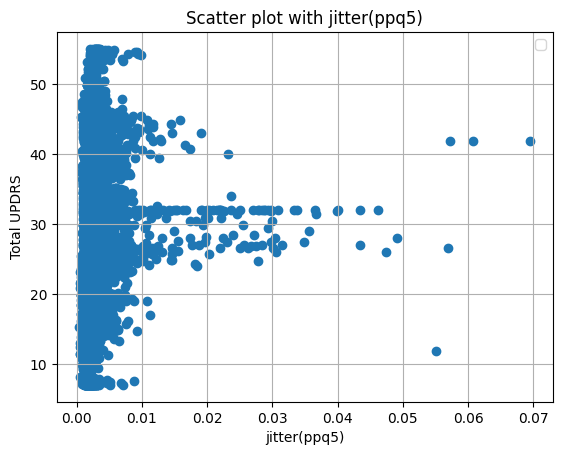

Column Name :  jitter(ddp)


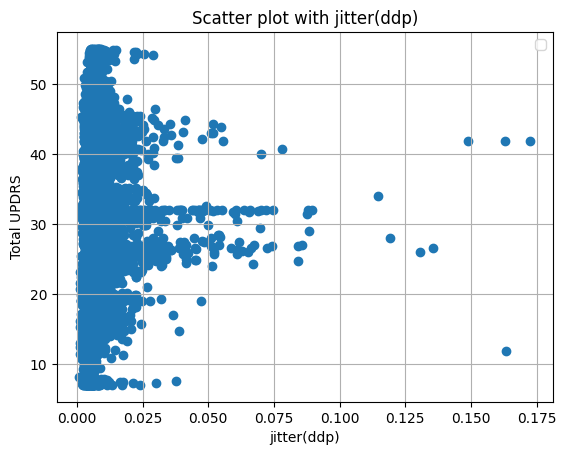

Column Name :  shimmer(%)


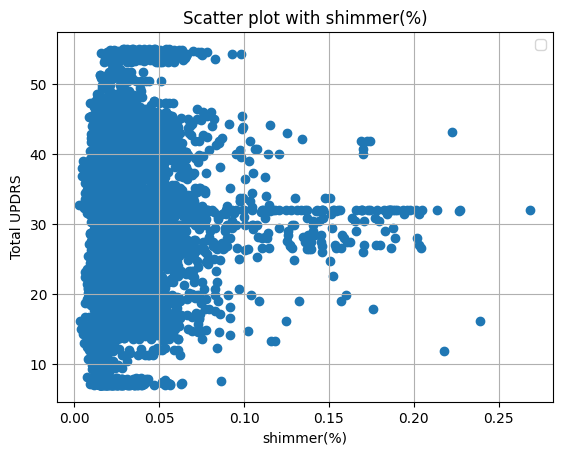

Column Name :  shimmer(abs)


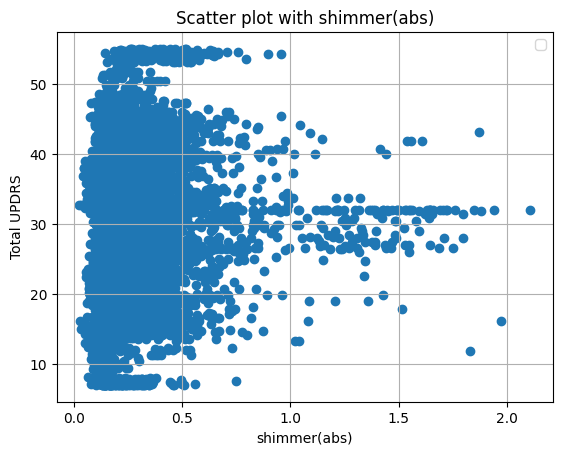

Column Name :  shimmer(apq3)


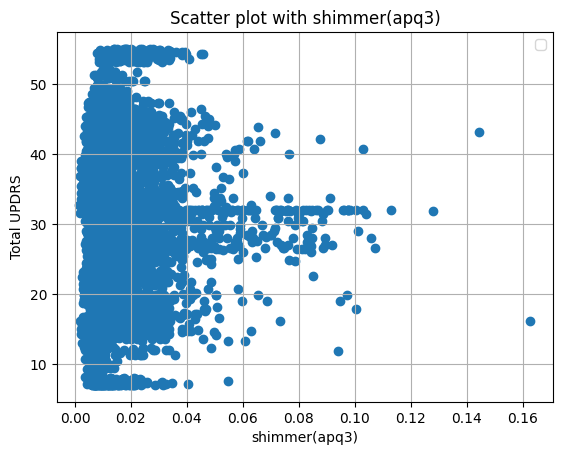

Column Name :  shimmer(apq5)


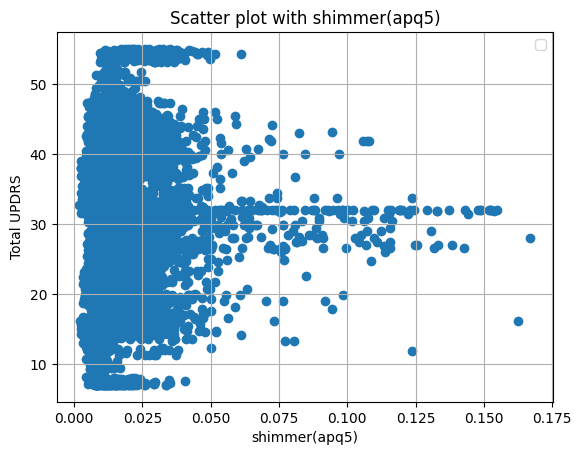

Column Name :  shimmer(apq11)


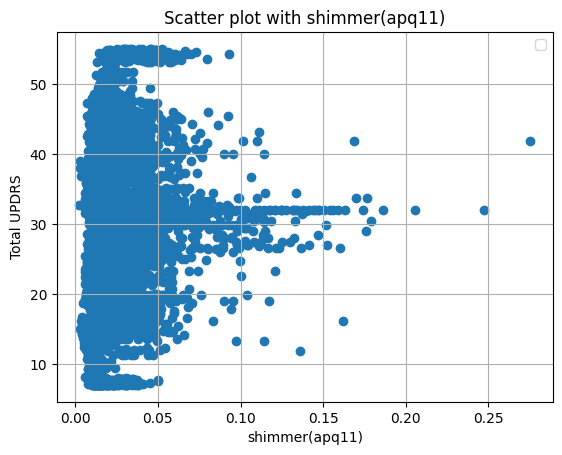

Column Name :  shimmer(dda)


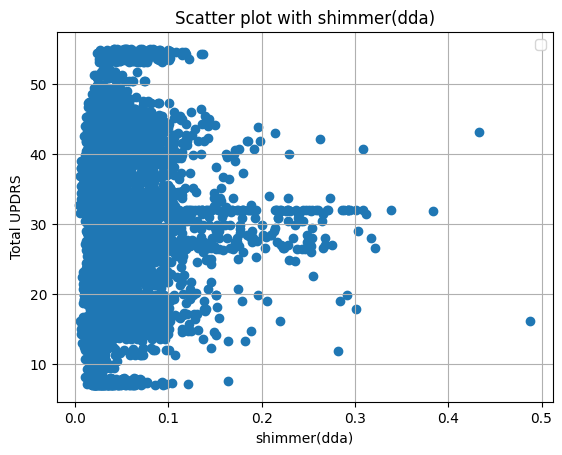

Column Name :  nhr


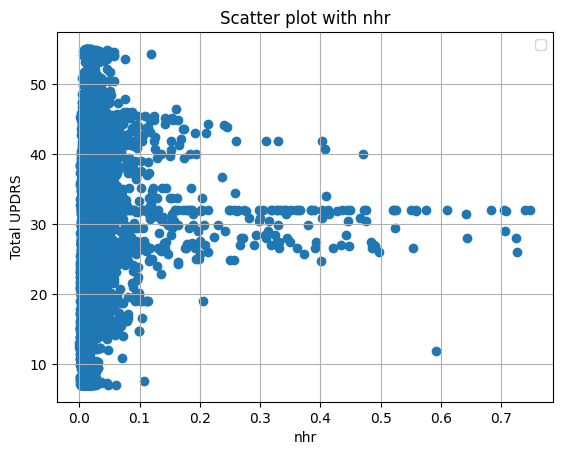

Column Name :  hnr


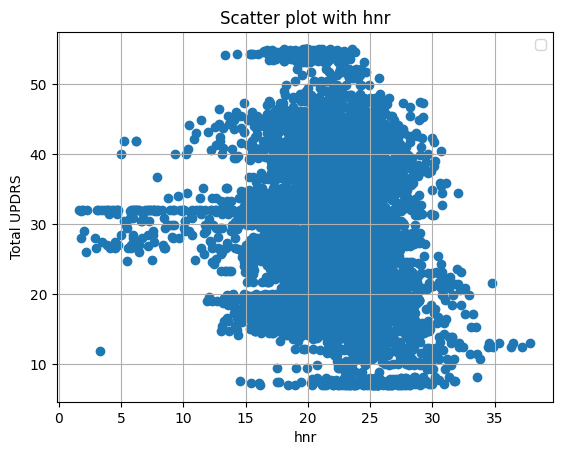

Column Name :  rpde


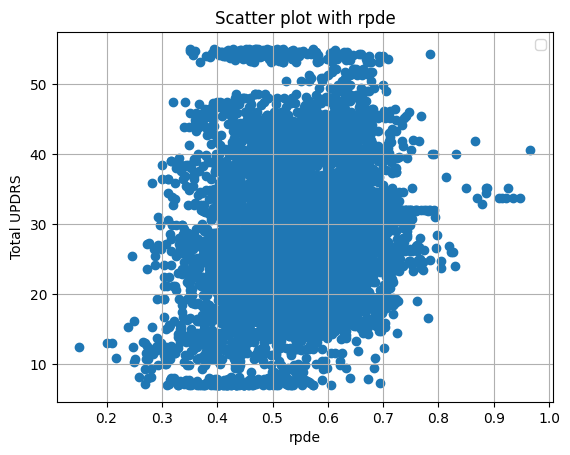

Column Name :  dfa


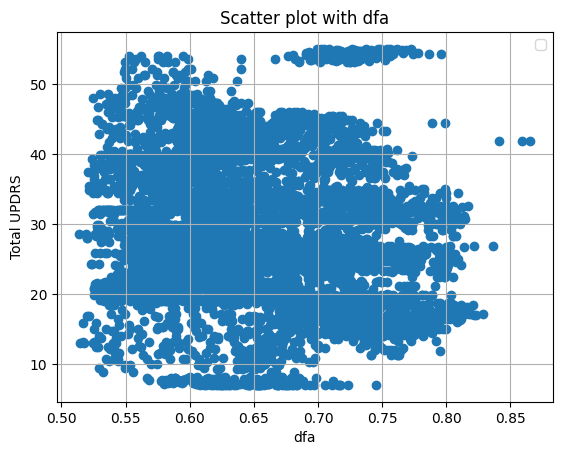

Column Name :  ppe


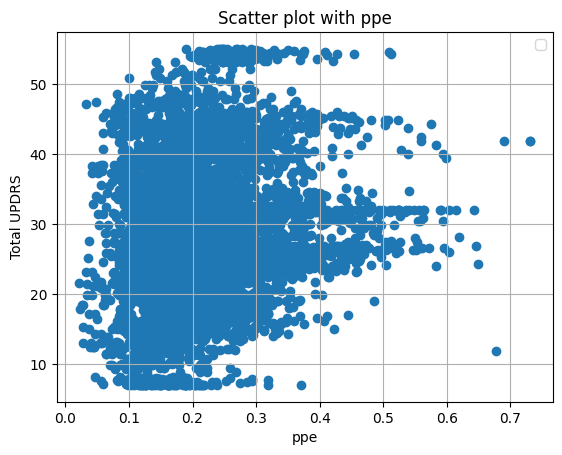

In [41]:

for column in df.columns:
    print("Column Name : ", column)
    if column not in useless_columns and column is not "total_updrs" and column is not "motor_updrs":
        xseries = np.array(df[column])
        yseries = np.array(Y_totol_UPDRS)


        plt.scatter(xseries, yseries)
        plt.title(f'Scatter plot with {column}')
        plt.xlabel(column)
        plt.ylabel("Total UPDRS")
        plt.legend()
        plt.grid(True)
        plt.show()

**Scatter Plot of all columns against Mobile updrs**

Column Name :  subject#
Column Name :  age


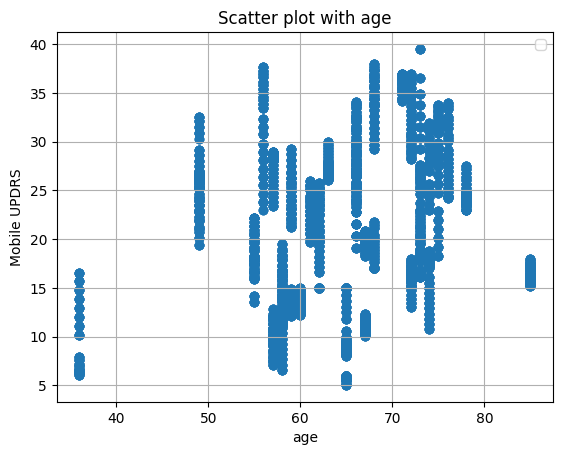

Column Name :  sex


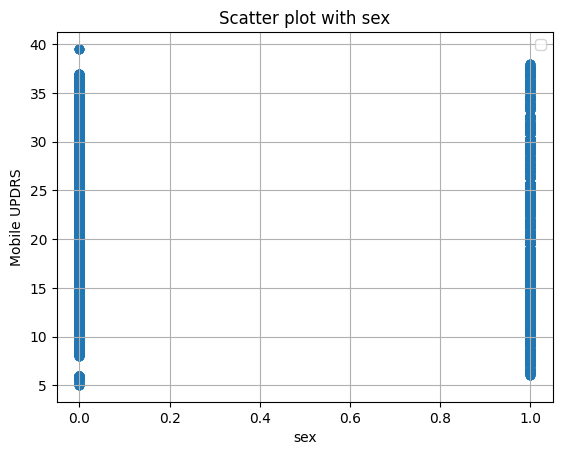

Column Name :  test_time


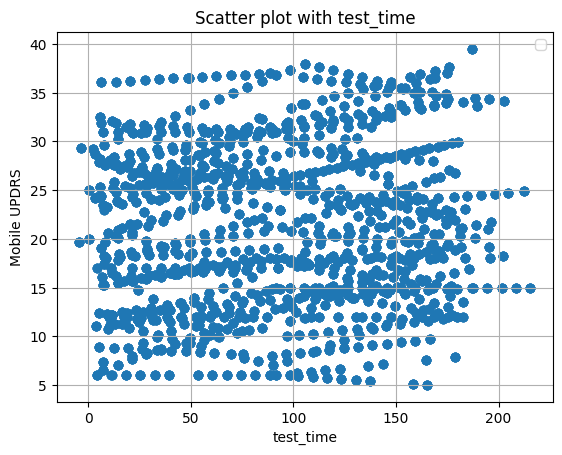

Column Name :  motor_updrs


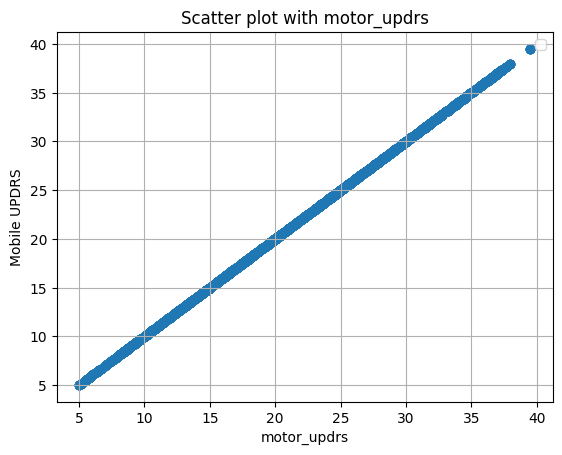

Column Name :  total_updrs


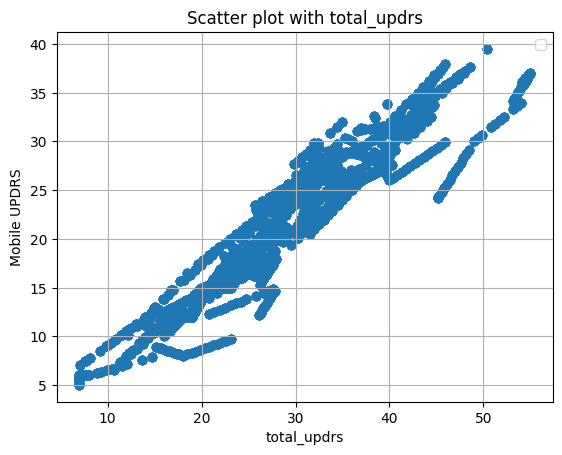

Column Name :  jitter(%)


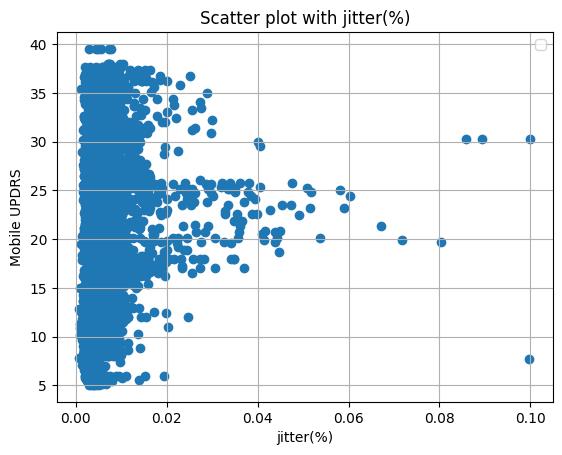

Column Name :  jitter(abs)


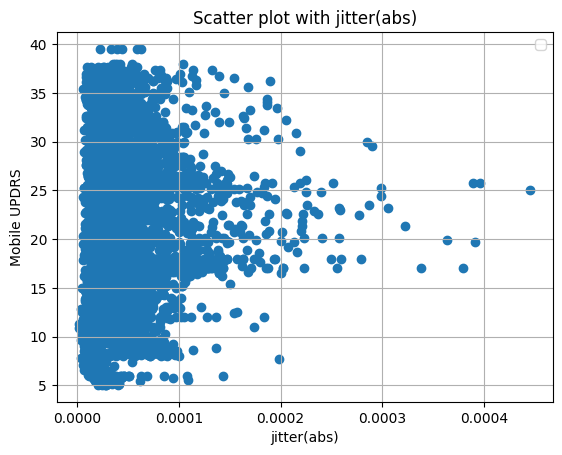

Column Name :  jitter(rap)


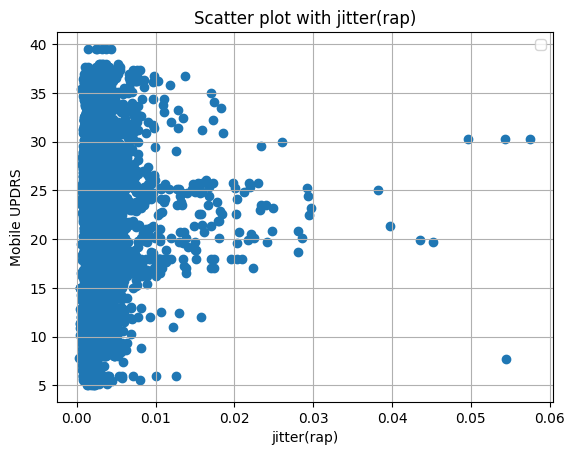

Column Name :  jitter(ppq5)


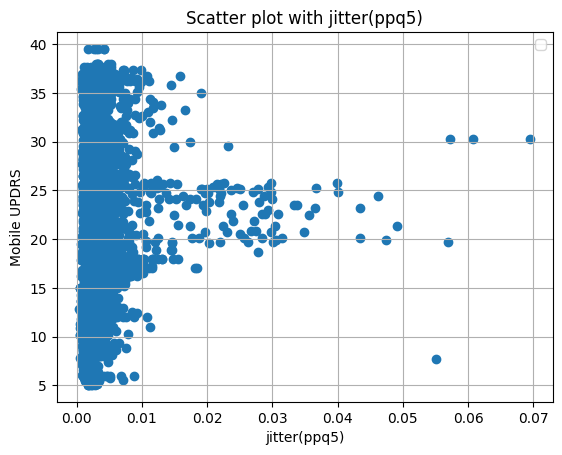

Column Name :  jitter(ddp)


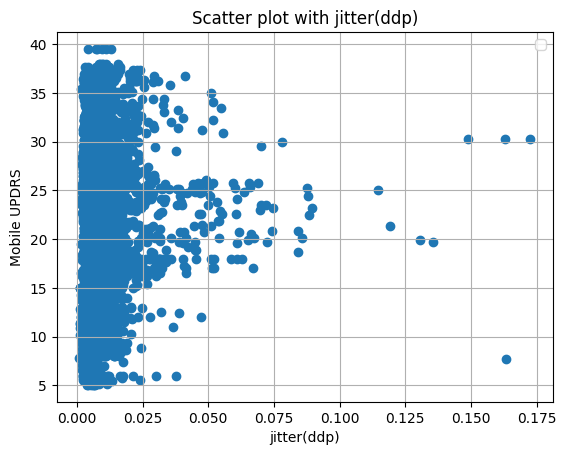

Column Name :  shimmer(%)


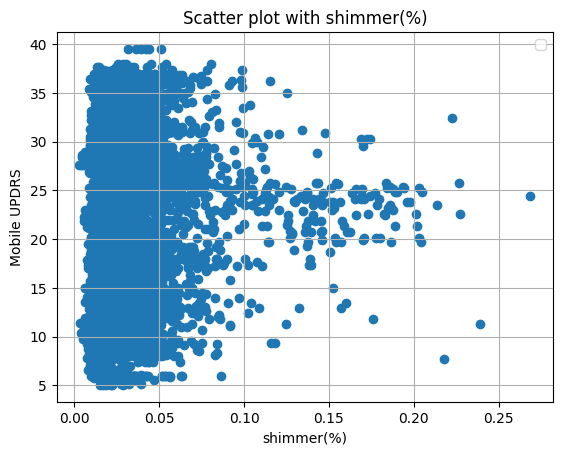

Column Name :  shimmer(abs)


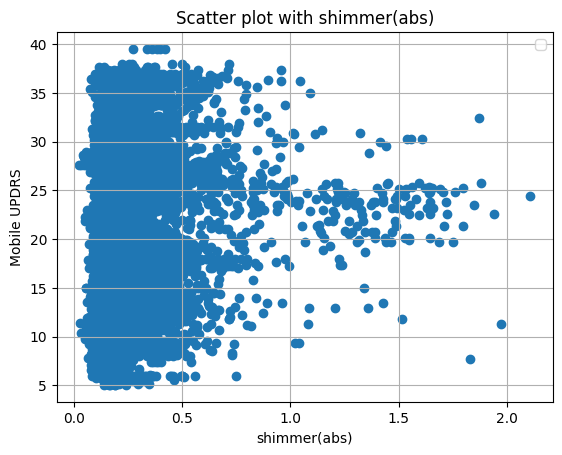

Column Name :  shimmer(apq3)


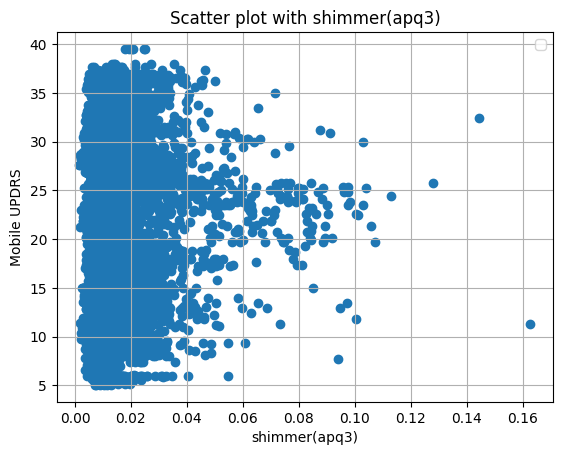

Column Name :  shimmer(apq5)


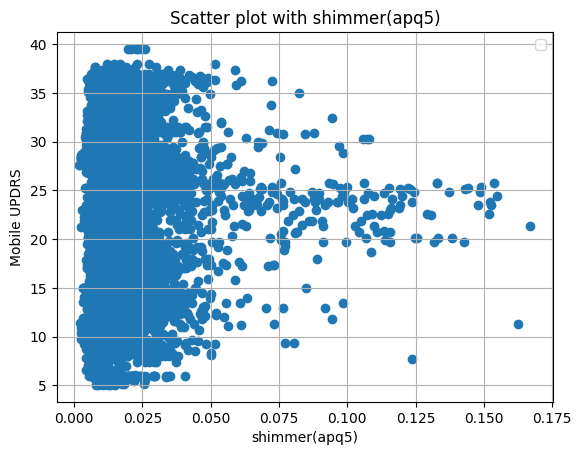

Column Name :  shimmer(apq11)


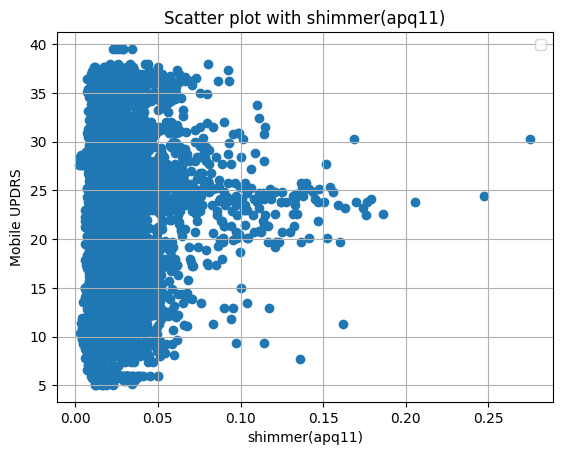

Column Name :  shimmer(dda)


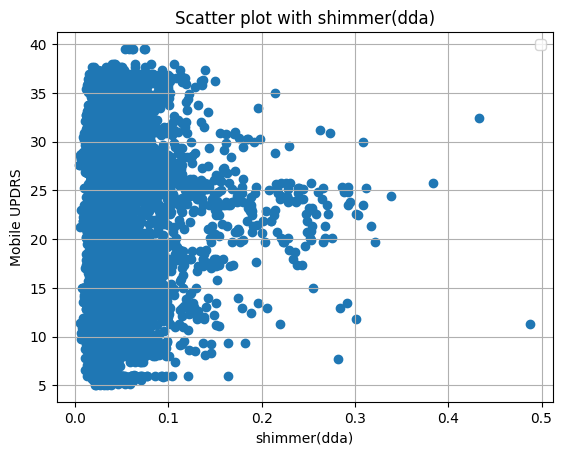

Column Name :  nhr


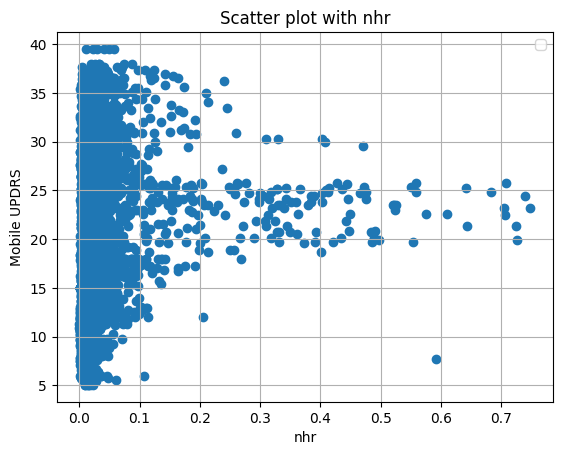

Column Name :  hnr


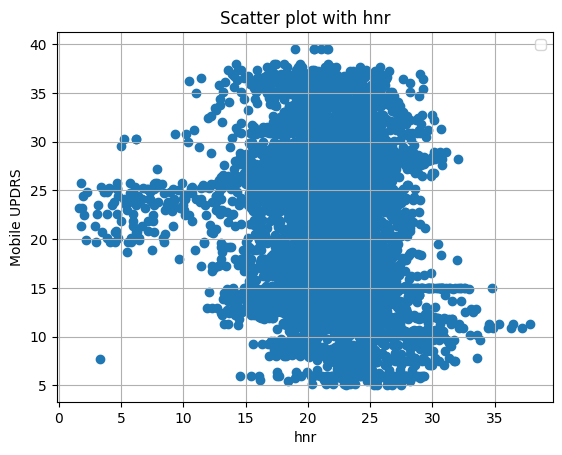

Column Name :  rpde


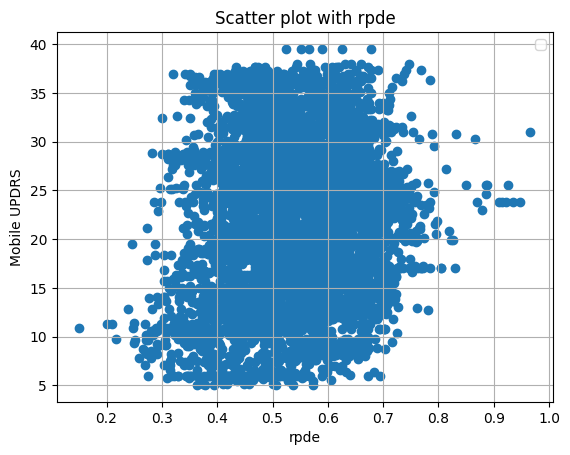

Column Name :  dfa


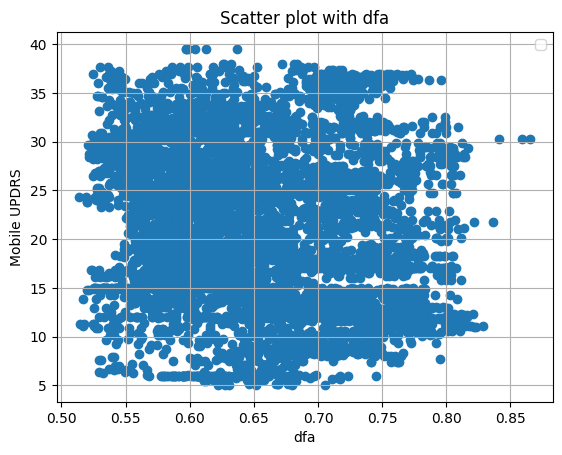

Column Name :  ppe


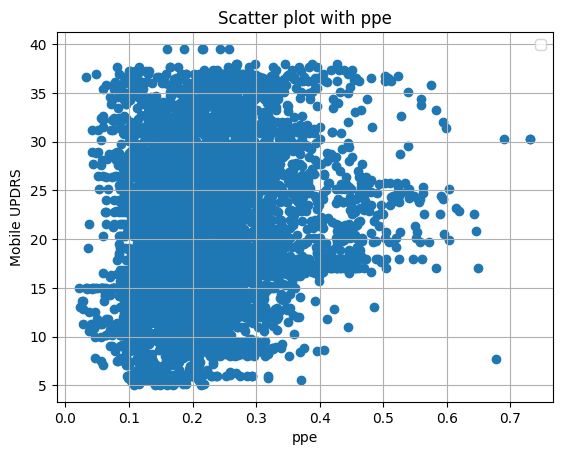

In [42]:
for column in df.columns:
    print("Column Name : ", column)
    if column not in useless_columns and column is not "total_updrs" and column is not "motor_updrs":
        xseries = np.array(df[column])
        yseries = np.array(Y_mobile_UPDRS)


        plt.scatter(xseries, yseries)
        plt.title(f'Scatter plot with {column}')
        plt.xlabel(column)
        plt.ylabel("Mobile UPDRS")
        plt.legend()
        plt.grid(True)
        plt.show()